In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted

In [2]:
#Reading the pangenome matrix that was produced as output of get_homologies.pl (http://eead-csic-compbio.github.io/get_homologues/manual/)
#and the accompanying script parse_pangenome_matrix.pl with the input of the available genomes (both, draft and complete) 
#of the strains of interest 
pan_mtx=pd.read_table(r"C:\Users\Marina Dziuba\Google Drive\Manuscript3_HeteroHostsSurvey\Analyse\MTB_vs_FH_homologues_15112022\sample_intersection\pangenome_matrix_t0.tr.tab")
pan_mtx=pan_mtx.dropna(axis=1) #cleans the potential na in the dataframe
pan_mtx

,source:/home/wmlinux/dir1/get_homologues-x86_64-20210828/MTB_vs_FH_15112022_homologues/sample_intersection,Agrobacterium_tumefaciens_C58_full.gb,_Azospirillum_brasilense_Sp7_full.gbk,_Blastochloris_viridis_DSM133.gb,_Magnetospirillu_15-1.gb,_Magnetospirillum.gbk,_Magnetospirillum_gryphiswaldense_NZ_CP027526.gb,_Mesorhizobium_japonicum_MAFF303099_full.gbk,_Rhodobacter_capsulatus_SB1003_full.gbk,_Rhodobacter_sphaeroides_2.4.1_full.gbk,_Rhodoblastus_acidophilus_DSM137.gb,_Rhodomicrobium_vannielii_ATCC.gbk,_Rhodoplanes_elegans_DSM11907.gb,_Rhodopseudomonas_pseudopalustris_DSM123.gb,_Rhodospirillum_rubrum_ATCC11170_full.gbk,_Rhodovastum_atsumiense.gbk,_Rhodovastum_atsumiense_G2-11.gbk,_Rubrivivax_gelatinosus_DSM1709.gb
0,7_fxsA.faa,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0
1,11_transcriptional_regu...faa,1,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0
2,13_NAD-P-H-flavin_oxido...faa,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,1,0
3,28_hypothetical_protein.faa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35_pckA.faa,1,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27034,83307_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27035,83308_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27036,83311_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27037,83317_rpmJ.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Defining functions for parsing the pangenome matrix

In [3]:
#Function to retrieve the genes that are shared by group A, but not by group B. 
#Additionaly, returns the number of such genes 
def group_specific_genes(tab, group1, group2):
    genes_a_unique=[]
    unique_count=0
    for i, row in tab.iterrows():
        if (row[group1]!=0).all() and (row[group2]==0).all():
            unique_count=unique_count+1
            genes_a_unique.append(row[0])
#    print("Number of orthologous groups present in all: ", group1, ",")
#    print("but absent in all ", group2, ":", unique_count)
    return genes_a_unique, unique_count

In [4]:
#Function to retrieve the genes that are shared by all specified species. 
#Additionaly, returns the number of such genes
def  shared_genes(tab, group):
    genes_shared=[]
    ab_count=0
    for i, row in tab.iterrows():
        if (row[group]!=0).all():
            ab_count=ab_count+1
            genes_shared.append(row[0])
#    print("Number of orthologous groups present in all: ", group, ":", ab_count)
    return genes_shared, ab_count

# Comparison of the orthologous protein groups in all "non-magnetized" species with the magnetotactic/the experimentally "magnetized" species 

In [5]:
#Create lists of organisms, whose shared orthologues we want to compare. The strain names should be exactly as in the column
#names of the pangenome matrix

#Magnetospirillum gryphiswaldense and the "magnetized" species
sp_group_a=["_Blastochloris_viridis_DSM133.gb", 
            "_Magnetospirillu_15-1.gb", 
            "_Magnetospirillum_gryphiswaldense_NZ_CP027526.gb",
            "_Rhodobacter_sphaeroides_2.4.1_full.gbk", 
            "_Rhodoblastus_acidophilus_DSM137.gb",
            "_Rhodomicrobium_vannielii_ATCC.gbk",
            "_Rhodoplanes_elegans_DSM11907.gb",
            "_Rhodopseudomonas_pseudopalustris_DSM123.gb",
            "_Rhodospirillum_rubrum_ATCC11170_full.gbk",
            "_Rhodovastum_atsumiense_G2-11.gbk",
            "_Azospirillum_brasilense_Sp7_full.gbk"]

#"Not magnetized" species
sp_group_b=["Agrobacterium_tumefaciens_C58_full.gb",
            "_Rhodobacter_capsulatus_SB1003_full.gbk",
            "_Mesorhizobium_japonicum_MAFF303099_full.gbk",
           "_Rubrivivax_gelatinosus_DSM1709.gb"
           ]

In [6]:
#Finding the protein orthologues shared by all members in the magnetotactic and "magnetized" group of species but absent in the #"not magnetized" group
genes_a_unique, unique_a_count=group_specific_genes(pan_mtx, sp_group_a, sp_group_b)
genes_a_unique, unique_a_count

(['11713_chemotaxis_protein_C...faa'], 1)

In [7]:
#Finding the protein orthologues shared by all members in the "not magnetized" group but absent in the magnetotactic and "magnetized" group of species
genes_b_unique, unique_b_count=group_specific_genes(pan_mtx, sp_group_b, sp_group_a)
genes_b_unique, unique_b_count

(['1857_rbsB.faa'], 1)

In [8]:
#Finding the protein orthologues shared by both groups
genes_shared, count=shared_genes(pan_mtx, sp_group_a+sp_group_b)
genes_shared, count

(['11029_Bcr-CflA_family_effl...faa',
  '11047_DEAD-DEAH_box_helica...faa',
  '11049_iron-sulfur_cluster_...faa',
  '11050_DUF59_domain-contain...faa',
  '11057_aminotransferase_cla...faa',
  '11058_alpha-beta_hydrolase.faa',
  '11062_cold-shock_protein.faa',
  '11066_aldehyde_dehydrogena...faa',
  '11075_prfB.faa',
  '11084_penicillin-binding_p...faa',
  '11085_N-acetylmuramoyl-L-a...faa',
  '11087_aminotransferase_cla...faa',
  '11090_acetyl-CoA_carboxyla...faa',
  '11091_accC.faa',
  '11092_leucyl-phenylalanyl-...faa',
  '11114_aspS.faa',
  '11117_RNA_degradosome_poly...faa',
  '11118_hypothetical_protein.faa',
  '11119_AI-2E_family_transpo...faa',
  '11121_phosphoribosylformyl...faa',
  '11122_phosphoribosylglycin...faa',
  '11126_ndk.faa',
  '11131_glycerate_kinase.faa',
  '11152_lon.faa',
  '11153_clpX.faa',
  '11154_ATP-dependent_Clp_pr...faa',
  '11155_trigger_factor.faa',
  '11157_bifunctional_ADP-dep...faa',
  '11158_P-II_family_nitrogen...faa',
  '11159_glnA.faa',
  '11162_a

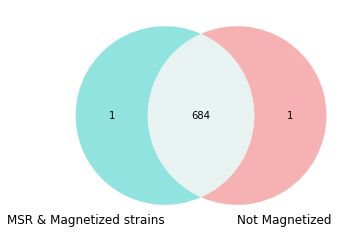

In [9]:
#Drawing a Venn diagramm
left="MSR & Magnetized strains"
right="Not Magnetized"
x=unique_a_count
y=unique_b_count
z=count

venn2_unweighted(subsets=(x, y, z), set_labels=(left, right),set_colors=("mediumturquoise", "lightcoral"), alpha=0.6)
#plt.savefig(r"C:/Users/Marina Dziuba/Google Drive/Manuscript3_HeteroHostsSurvey/Analyse/Heterohost_Analyse/Images/Venn_MSR_Mag_vs_NonMag.eps", format="ps")

# Comparison of the orthologous protein groups in Agrobacterium tumefaciens C58 (not magnetized) with the magnetotactic/the experimentally "magnetized" species 

In [10]:
#Place A. tumefaciens in the group b
sp_group_b=["Agrobacterium_tumefaciens_C58_full.gb"]

In [11]:
#Finding the protein orthologues shared by all members in the magnetotactic and "magnetized" group of species but absent in 
#A. tumefaciens
genes_a_unique, unique_a_count=group_specific_genes(pan_mtx, sp_group_a, sp_group_b)
genes_a_unique, unique_a_count

(['11110_CidA-LrgA_family_pro...faa',
  '11111_LrgB_family_protein.faa',
  '11195_fliM.faa',
  '11327_elongation_factor_G.faa',
  '11390_citramalate_synthase.faa',
  '11472_AAA_family_ATPase.faa',
  '11593_phytoene-squalene_sy...faa',
  '11601_form_I_ribulose_bisp...faa',
  '11607_fructose-bisphosphat...faa',
  '11713_chemotaxis_protein_C...faa',
  '12080_propionyl-CoA_synthe...faa',
  '12228_mtnA.faa',
  '12248_lysine--tRNA_ligase.faa',
  '12472_oxidoreductase.faa',
  '12484_YggT_family_protein.faa',
  '12530_penicillin-binding_p...faa',
  '12665_aroA.faa',
  '12837_meaB.faa',
  '12924_hydrogenase_small_su...faa',
  '12925_nickel-dependent_hyd...faa',
  '12927_HyaD-HybD_family_hyd...faa',
  '12934_hypA.faa',
  '12935_hypB.faa',
  '12937_HypC-HybG-HupF_famil...faa',
  '12938_hypD.faa',
  '12939_hypE.faa',
  '12986_S-methyl-5--thioaden...faa',
  '13063_copper_chaperone_PCu...faa',
  '13077_DUF2892_domain-conta...faa',
  '13172_nifA.faa',
  '13173_nifB.faa',
  '13174_4Fe-4S_binding_prote

In [12]:
#Finding the protein orthologues shared by A. tumefaciens but absent in the magnetotactic and "magnetized" group of species
genes_b_unique, unique_b_count=group_specific_genes(pan_mtx, sp_group_b, sp_group_a)
genes_b_unique, unique_b_count

(['28_hypothetical_protein.faa',
  '46_conserved_hypothetic...faa',
  '53_hypothetical_protein.faa',
  '54_hypothetical_protein.faa',
  '61_nrdH.faa',
  '62_nrdI.faa',
  '69_hypothetical_protein.faa',
  '97_hypothetical_protein.faa',
  '99_hypothetical_protein.faa',
  '102_hypothetical_protein.faa',
  '104_conserved_hypothetic...faa',
  '108_hypothetical_protein.faa',
  '109_conserved_hypothetic...faa',
  '110_conserved_hypothetic...faa',
  '116_hypothetical_protein.faa',
  '136_hypothetical_protein.faa',
  '137_gltB.faa',
  '144_hypothetical_protein.faa',
  '147_hypothetical_protein.faa',
  '148_conserved_hypothetic...faa',
  '155_tonB.faa',
  '157_hypothetical_protein.faa',
  '158_hypothetical_protein.faa',
  '164_phnE.faa',
  '196_conserved_hypothetic...faa',
  '202_hypothetical_protein.faa',
  '215_hypothetical_protein.faa',
  '219_hypothetical_protein.faa',
  '224_transcriptional_regu...faa',
  '225_conserved_hypothetic...faa',
  '237_transcriptional_regu...faa',
  '246_conserved_

In [13]:
#Finding the protein orthologues shared by all strains
genes_shared, count=shared_genes(pan_mtx, sp_group_a+sp_group_b)
genes_shared, count

(['11029_Bcr-CflA_family_effl...faa',
  '11047_DEAD-DEAH_box_helica...faa',
  '11049_iron-sulfur_cluster_...faa',
  '11050_DUF59_domain-contain...faa',
  '11057_aminotransferase_cla...faa',
  '11058_alpha-beta_hydrolase.faa',
  '11062_cold-shock_protein.faa',
  '11066_aldehyde_dehydrogena...faa',
  '11070_DUF3971_domain-conta...faa',
  '11075_prfB.faa',
  '11084_penicillin-binding_p...faa',
  '11085_N-acetylmuramoyl-L-a...faa',
  '11087_aminotransferase_cla...faa',
  '11089_DsbA_family_protein.faa',
  '11090_acetyl-CoA_carboxyla...faa',
  '11091_accC.faa',
  '11092_leucyl-phenylalanyl-...faa',
  '11095_NADH-ubiquinone_oxid...faa',
  '11114_aspS.faa',
  '11115_rnd.faa',
  '11116_ppx.faa',
  '11117_RNA_degradosome_poly...faa',
  '11118_hypothetical_protein.faa',
  '11119_AI-2E_family_transpo...faa',
  '11121_phosphoribosylformyl...faa',
  '11122_phosphoribosylglycin...faa',
  '11126_ndk.faa',
  '11131_glycerate_kinase.faa',
  '11152_lon.faa',
  '11153_clpX.faa',
  '11154_ATP-dependent_Cl

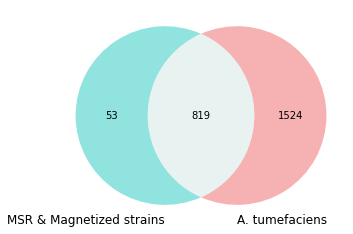

In [14]:
#Drawing a Venn diagramm
left="MSR & Magnetized strains"
right="A. tumefaciens"
x=unique_a_count
y=unique_b_count
z=count

venn2_unweighted(subsets=(x, y, z), set_labels=(left, right),set_colors=("mediumturquoise", "lightcoral"), alpha=0.6)
#plt.savefig(r"C:/Users/Marina Dziuba/Google Drive/Manuscript3_HeteroHostsSurvey/Analyse/Heterohost_Analyse/Images/Venn_MSR_Mag_vs_Atumefaciens.eps", format="ps")

# Comparison of the orthologous protein groups in Rhodobacter capsulatus SB1003 (not magnetized) with the magnetotactic/the experimentally "magnetized" species 

In [15]:
#Place R. capsulatus in the group b
sp_group_b=["_Rhodobacter_capsulatus_SB1003_full.gbk"]

In [16]:
#Finding the protein orthologues shared by all members in the magnetotactic and "magnetized" group of species but absent in 
#R. capsulatus
genes_a_unique, unique_a_count=group_specific_genes(pan_mtx, sp_group_a, sp_group_b)
genes_a_unique, unique_a_count

(['11195_fliM.faa',
  '11238_ABC_transporter_perm...faa',
  '11298_GatB-YqeY_domain-con...faa',
  '11326_msrP.faa',
  '11395_CreA_family_protein.faa',
  '11472_AAA_family_ATPase.faa',
  '11713_chemotaxis_protein_C...faa',
  '11865_prmC.faa',
  '11886_tyrosine_recombinase.faa',
  '12075_BolA_family_transcri...faa',
  '12143_4a-hydroxytetrahydro...faa',
  '12191_rsmG.faa',
  '12205_MltA_domain-containi...faa',
  '12472_oxidoreductase.faa',
  '12831_30S_ribosomal_protei...faa',
  '12860_branched-chain_amino...faa',
  '12861_branched-chain_amino...faa',
  '12862_ABC_transporter_subs...faa',
  '12863_ABC_transporter_ATP-...faa',
  '12864_ATP-binding_cassette...faa',
  '12951_DUF2189_domain-conta...faa',
  '12968_metallophosphoestera...faa',
  '13120_response_regulator_t...faa',
  '13121_ATP-binding_protein.faa',
  '13130_response_regulator_t...faa',
  '13131_HAMP_domain-containi...faa',
  '13537_histone_deacetylase_...faa',
  '13591_arsC.faa',
  '13974_serine_hydrolase.faa',
  '14002_queC.f

In [17]:
#Finding the protein orthologues shared by R. capsulatus but absent in the magnetotactic and "magnetized" group of species
genes_b_unique, unique_b_count=group_specific_genes(pan_mtx, sp_group_b, sp_group_a)
genes_b_unique, unique_b_count

(['237_transcriptional_regu...faa',
  '255_oxidoreductase.faa',
  '501_conserved_hypothetic...faa',
  '575_aglR.faa',
  '1857_rbsB.faa',
  '1861_glpK.faa',
  '1970_conserved_hypothetic...faa',
  '2227_tdk.faa',
  '2526_MFS_permease.faa',
  '2767_hypothetical_protein.faa',
  '2843_conserved_hypothetic...faa',
  '2844_conserved_hypothetic...faa',
  '3062_celE.faa',
  '3133_amidohydrolase.faa',
  '3150_methyltransferase.faa',
  '3428_siderophore_biosynth...faa',
  '3725_proC.faa',
  '3823_transcriptional_regu...faa',
  '3825_cydC.faa',
  '4212_nitroreductase.faa',
  '4370_conserved_hypothetic...faa',
  '5053_aminopeptidase.faa',
  '5224_potF.faa',
  '20867_Predicted_transcript...faa',
  '23290_hypothetical_protein.faa',
  '28065_leucyl_aminopeptidas...faa',
  '28933_ornithine_cyclodeami...faa',
  '29042_rsgA.faa',
  '29179_hypothetical_protein.faa',
  '29275_VOC_family_protein.faa',
  '29291_type_II_toxin-antito...faa',
  '29484_hypothetical_protein.faa',
  '30849_basic_amino_acid_ABC...f

In [18]:
#Finding the protein orthologues shared by all strains
genes_shared, count=shared_genes(pan_mtx, sp_group_a+sp_group_b)
genes_shared, count

(['11029_Bcr-CflA_family_effl...faa',
  '11047_DEAD-DEAH_box_helica...faa',
  '11049_iron-sulfur_cluster_...faa',
  '11050_DUF59_domain-contain...faa',
  '11057_aminotransferase_cla...faa',
  '11058_alpha-beta_hydrolase.faa',
  '11062_cold-shock_protein.faa',
  '11066_aldehyde_dehydrogena...faa',
  '11070_DUF3971_domain-conta...faa',
  '11075_prfB.faa',
  '11084_penicillin-binding_p...faa',
  '11085_N-acetylmuramoyl-L-a...faa',
  '11087_aminotransferase_cla...faa',
  '11089_DsbA_family_protein.faa',
  '11090_acetyl-CoA_carboxyla...faa',
  '11091_accC.faa',
  '11092_leucyl-phenylalanyl-...faa',
  '11095_NADH-ubiquinone_oxid...faa',
  '11110_CidA-LrgA_family_pro...faa',
  '11111_LrgB_family_protein.faa',
  '11114_aspS.faa',
  '11115_rnd.faa',
  '11116_ppx.faa',
  '11117_RNA_degradosome_poly...faa',
  '11118_hypothetical_protein.faa',
  '11119_AI-2E_family_transpo...faa',
  '11121_phosphoribosylformyl...faa',
  '11122_phosphoribosylglycin...faa',
  '11126_ndk.faa',
  '11131_glycerate_kina

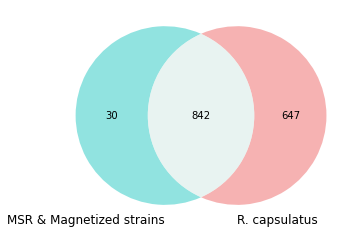

In [19]:
#Drawing a Venn diagramm
left="MSR & Magnetized strains"
right="R. capsulatus"
x=unique_a_count
y=unique_b_count
z=count

venn2_unweighted(subsets=(x, y, z), set_labels=(left, right),set_colors=("mediumturquoise", "lightcoral"), alpha=0.6)
#plt.savefig(r"C:/Users/Marina Dziuba/Google Drive/Manuscript3_HeteroHostsSurvey/Analyse/Heterohost_Analyse/Images/Venn_MSR_Mag_vs_Rcaps.eps", format="ps")

# Comparison of the orthologous protein groups in M. japonicum (not magnetized) with the magnetotactic/the experimentally "magnetized" species 

In [20]:
#Place A. tumefaciens in the group b
sp_group_b=["_Mesorhizobium_japonicum_MAFF303099_full.gbk"]

In [21]:
#Finding the protein orthologues shared by all members in the magnetotactic and "magnetized" group of species but absent in 
#M. japonicum
genes_a_unique, unique_a_count=group_specific_genes(pan_mtx, sp_group_a, sp_group_b)
genes_a_unique, unique_a_count

(['11110_CidA-LrgA_family_pro...faa',
  '11111_LrgB_family_protein.faa',
  '11195_fliM.faa',
  '11593_phytoene-squalene_sy...faa',
  '11713_chemotaxis_protein_C...faa',
  '11770_purU.faa',
  '11799_metH.faa',
  '12095_rplU.faa',
  '12530_penicillin-binding_p...faa',
  '12837_meaB.faa',
  '12859_NnrS_family_protein.faa',
  '12862_ABC_transporter_subs...faa',
  '12864_ATP-binding_cassette...faa',
  '12924_hydrogenase_small_su...faa',
  '12925_nickel-dependent_hyd...faa',
  '12927_HyaD-HybD_family_hyd...faa',
  '12934_hypA.faa',
  '12935_hypB.faa',
  '12937_HypC-HybG-HupF_famil...faa',
  '12938_hypD.faa',
  '12939_hypE.faa',
  '13032_1-deoxy-D-xylulose-5...faa',
  '13077_DUF2892_domain-conta...faa',
  '13183_nifV.faa',
  '13650_ferrous_iron_transpo...faa',
  '13833_trpE.faa',
  '13873_secF.faa',
  '14070_modD.faa'],
 28)

In [22]:
#Finding the protein orthologues shared by M. japonicum but absent in the magnetotactic and "magnetized" group of species
genes_b_unique, unique_b_count=group_specific_genes(pan_mtx, sp_group_b, sp_group_a)
genes_b_unique, unique_b_count

(['46_conserved_hypothetic...faa',
  '104_conserved_hypothetic...faa',
  '164_phnE.faa',
  '224_transcriptional_regu...faa',
  '252_oxidoreductase.faa',
  '255_oxidoreductase.faa',
  '259_mandelate_racemase_-...faa',
  '260_transcriptional_regu...faa',
  '263_ampS.faa',
  '271_pfs.faa',
  '307_conserved_hypothetic...faa',
  '328_SAM_dependent_methyl...faa',
  '379_ubiE.faa',
  '392_conserved_hypothetic...faa',
  '401_hypothetical_protein.faa',
  '404_conserved_hypothetic...faa',
  '427_putative_phage_repre...faa',
  '429_hypothetical_protein.faa',
  '431_conserved_hypothetic...faa',
  '435_nusG.faa',
  '510_luxR.faa',
  '546_fliM.faa',
  '575_aglR.faa',
  '619_conserved_hypothetic...faa',
  '671_conserved_hypothetic...faa',
  '697_conserved_hypothetic...faa',
  '713_conserved_hypothetic...faa',
  '739_conserved_hypothetic...faa',
  '754_conserved_hypothetic...faa',
  '762_conserved_hypothetic...faa',
  '777_conserved_hypothetic...faa',
  '778_hypothetical_protein.faa',
  '820_transcrip

In [23]:
#Finding the protein orthologues shared by all strains
genes_shared, count=shared_genes(pan_mtx, sp_group_a+sp_group_b)
genes_shared, count

(['11029_Bcr-CflA_family_effl...faa',
  '11047_DEAD-DEAH_box_helica...faa',
  '11049_iron-sulfur_cluster_...faa',
  '11050_DUF59_domain-contain...faa',
  '11057_aminotransferase_cla...faa',
  '11058_alpha-beta_hydrolase.faa',
  '11062_cold-shock_protein.faa',
  '11066_aldehyde_dehydrogena...faa',
  '11070_DUF3971_domain-conta...faa',
  '11075_prfB.faa',
  '11084_penicillin-binding_p...faa',
  '11085_N-acetylmuramoyl-L-a...faa',
  '11087_aminotransferase_cla...faa',
  '11089_DsbA_family_protein.faa',
  '11090_acetyl-CoA_carboxyla...faa',
  '11091_accC.faa',
  '11092_leucyl-phenylalanyl-...faa',
  '11095_NADH-ubiquinone_oxid...faa',
  '11114_aspS.faa',
  '11115_rnd.faa',
  '11116_ppx.faa',
  '11117_RNA_degradosome_poly...faa',
  '11118_hypothetical_protein.faa',
  '11119_AI-2E_family_transpo...faa',
  '11121_phosphoribosylformyl...faa',
  '11122_phosphoribosylglycin...faa',
  '11126_ndk.faa',
  '11131_glycerate_kinase.faa',
  '11152_lon.faa',
  '11153_clpX.faa',
  '11154_ATP-dependent_Cl

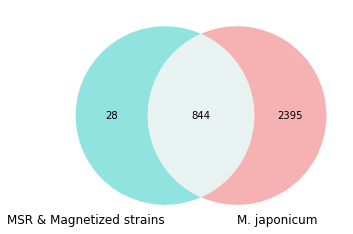

In [24]:
#Drawing a Venn diagramm
left="MSR & Magnetized strains"
right="M. japonicum"
x=unique_a_count
y=unique_b_count
z=count

venn2_unweighted(subsets=(x, y, z), set_labels=(left, right),set_colors=("mediumturquoise", "lightcoral"), alpha=0.6)
#plt.savefig(r"C:/Users/Marina Dziuba/Google Drive/Manuscript3_HeteroHostsSurvey/Analyse/Heterohost_Analyse/Images/Venn_MSR_Mag_vs_Mjapon.eps", format="ps")

# Comparison of the orthologous protein groups in Rvx. gelatinosus (not magnetized) with the magnetotactic/the experimentally "magnetized" species

In [25]:
#Place Rvx. gelatinosus in the group b
sp_group_b=["_Rubrivivax_gelatinosus_DSM1709.gb"]

In [26]:
#Finding the protein orthologues shared by all members in the magnetotactic and "magnetized" group of species but absent in 
#Rvx. gelatinosus
genes_a_unique, unique_a_count=group_specific_genes(pan_mtx, sp_group_a, sp_group_b)
genes_a_unique, unique_a_count

(['11070_DUF3971_domain-conta...faa',
  '11089_DsbA_family_protein.faa',
  '11095_NADH-ubiquinone_oxid...faa',
  '11110_CidA-LrgA_family_pro...faa',
  '11115_rnd.faa',
  '11116_ppx.faa',
  '11164_phosphoribosylaminoi...faa',
  '11165_purS.faa',
  '11166_purQ.faa',
  '11187_fliE.faa',
  '11212_histidine_phosphatas...faa',
  '11325_LysR_family_transcri...faa',
  '11327_elongation_factor_G.faa',
  '11377_recO.faa',
  '11386_NYN_domain-containin...faa',
  '11390_citramalate_synthase.faa',
  '11403_gor.faa',
  '11404_3-deoxy-7-phosphohep...faa',
  '11450_UPF0262_family_prote...faa',
  '11473_cytochrome_c_family_...faa',
  '11528_SDR_family_NAD-P--de...faa',
  '11531_tetratricopeptide_re...faa',
  '11559_hybrid_sensor_histid...faa',
  '11567_helix-turn-helix_tra...faa',
  '11577_NifU_family_protein.faa',
  '11628_hemA.faa',
  '11654_PBP1A_family_penicil...faa',
  '11667_ribonuclease_D.faa',
  '11708_response_regulator_t...faa',
  '11713_chemotaxis_protein_C...faa',
  '11904_disulfide_bond_fo

In [27]:
#Finding the protein orthologues shared byRvx. gelatinosus but absent in the magnetotactic and "magnetized" group of species
genes_b_unique, unique_b_count=group_specific_genes(pan_mtx, sp_group_b, sp_group_a)
genes_b_unique, unique_b_count

(['164_phnE.faa',
  '224_transcriptional_regu...faa',
  '623_aroA.faa',
  '814_conserved_hypothetic...faa',
  '976_permease.faa',
  '1024_conserved_hypothetic...faa',
  '1294_acetyltransferase.faa',
  '1620_cgmA.faa',
  '1793_mutT_like_protein.faa',
  '1857_rbsB.faa',
  '2305_S-methyltransferase.faa',
  '2398_uracil-DNA_glycosyla...faa',
  '2422_lipase_esterase.faa',
  '2427_cls.faa',
  '2447_ABC_transporter-_mem...faa',
  '2448_ABC_transporter-_nuc...faa',
  '2909_oxidoreductase.faa',
  '3037_aryl-alcohol_dehydro...faa',
  '3255_conserved_hypothetic...faa',
  '3272_acetyltransferase.faa',
  '3447_sigma_factor.faa',
  '3498_conserved_hypothetic...faa',
  '4033_two_component_sensor...faa',
  '4255_conserved_hypothetic...faa',
  '4793_virB9.faa',
  '4976_avhB5.faa',
  '4977_avhB6.faa',
  '4979_avhB8.faa',
  '4981_avhB10.faa',
  '4999_conserved_hypothetic...faa',
  '5002_peptidase.faa',
  '5043_dsd.faa',
  '5103_transcriptional_regu...faa',
  '5112_aminotransferase-_cl...faa',
  '20167_In

In [28]:
#Finding the protein orthologues shared by all strains
genes_shared, count=shared_genes(pan_mtx, sp_group_a+sp_group_b)
genes_shared, count

(['11029_Bcr-CflA_family_effl...faa',
  '11047_DEAD-DEAH_box_helica...faa',
  '11049_iron-sulfur_cluster_...faa',
  '11050_DUF59_domain-contain...faa',
  '11057_aminotransferase_cla...faa',
  '11058_alpha-beta_hydrolase.faa',
  '11062_cold-shock_protein.faa',
  '11066_aldehyde_dehydrogena...faa',
  '11075_prfB.faa',
  '11084_penicillin-binding_p...faa',
  '11085_N-acetylmuramoyl-L-a...faa',
  '11087_aminotransferase_cla...faa',
  '11090_acetyl-CoA_carboxyla...faa',
  '11091_accC.faa',
  '11092_leucyl-phenylalanyl-...faa',
  '11111_LrgB_family_protein.faa',
  '11114_aspS.faa',
  '11117_RNA_degradosome_poly...faa',
  '11118_hypothetical_protein.faa',
  '11119_AI-2E_family_transpo...faa',
  '11121_phosphoribosylformyl...faa',
  '11122_phosphoribosylglycin...faa',
  '11126_ndk.faa',
  '11131_glycerate_kinase.faa',
  '11152_lon.faa',
  '11153_clpX.faa',
  '11154_ATP-dependent_Clp_pr...faa',
  '11155_trigger_factor.faa',
  '11157_bifunctional_ADP-dep...faa',
  '11158_P-II_family_nitrogen...f

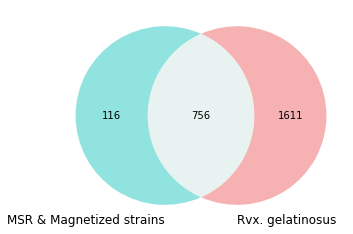

In [29]:
#Drawing a Venn diagramm
left="MSR & Magnetized strains"
right="Rvx. gelatinosus"
x=unique_a_count
y=unique_b_count
z=count

venn2_unweighted(subsets=(x, y, z), set_labels=(left, right),set_colors=("mediumturquoise", "lightcoral"), alpha=0.6)
#plt.savefig(r"C:/Users/Marina Dziuba/Google Drive/Manuscript3_HeteroHostsSurvey/Analyse/Heterohost_Analyse/Images/Venn_MSR_Mag_vs_Rvxgel.eps", format="ps")

# Polishing the dataset for supplementary materials

Making a pangenome matrix readable

In [30]:
#Rename the columns
df = pan_mtx.drop(["_Rhodovastum_atsumiense.gbk","_Magnetospirillum.gbk"], axis = 1) 
df = df.rename(columns={"source:/home/wmlinux/dir1/get_homologues-x86_64-20210828/sample_intersection":"Orthologous group",
                          "Agrobacterium_tumefaciens_C58_full.gb":"Agrobacterium tumefaciens C58",
                           "_Azospirillum_brasilense_Sp7_full.gbk": "Azospirillum brasilense Sp7",
                          "_Blastochloris_viridis_DSM133.gb":"Blastochloris viridis DSM133",
                          "_Magnetospirillu_15-1.gb":"Magnetospirillum sp. 15-1",
                          "_Magnetospirillum_gryphiswaldense_NZ_CP027526.gb": "Magnetospirillum_gryphiswaldense MSR-1 (CP027526)",
                          "_Mesorhizobium_japonicum_MAFF303099_full.gbk":"Mesorhizobium japonicum MAFF303099",
                          "_Rhodobacter_capsulatus_SB1003_full.gbk":"Rhodobacter capsulatus SB1003",
                          "_Rhodobacter_sphaeroides_2.4.1_full.gbk":"Rhodobacter sphaeroides 2.4.1",
                          "_Rhodoblastus_acidophilus_DSM137.gb":"Rhodoblastus acidophilus DSM137",
                          "_Rhodomicrobium_vannielii_ATCC.gbk":"Rhodomicrobium vannielii DSM 166",
                          "_Rhodoplanes_elegans_DSM11907.gb":"Rhodoplanes elegans DSM11907",
                          "_Rhodopseudomonas_pseudopalustris_DSM123.gb":"Rhodopseudomonas pseudopalustris DSM123",
                          "_Rhodospirillum_rubrum_ATCC11170_full.gbk":"Rhodospirillum rubrum ATCC11170",
                          "_Rhodovastum_atsumiense_G2-11.gbk":"Rhodovastum atsumiense G2-11",
                          "_Rubrivivax_gelatinosus_DSM1709.gb": "Rubrivivax gelatinosus DSM1709"})

df

,source:/home/wmlinux/dir1/get_homologues-x86_64-20210828/MTB_vs_FH_15112022_homologues/sample_intersection,Agrobacterium tumefaciens C58,Azospirillum brasilense Sp7,Blastochloris viridis DSM133,Magnetospirillum sp. 15-1,Magnetospirillum_gryphiswaldense MSR-1 (CP027526),Mesorhizobium japonicum MAFF303099,Rhodobacter capsulatus SB1003,Rhodobacter sphaeroides 2.4.1,Rhodoblastus acidophilus DSM137,Rhodomicrobium vannielii DSM 166,Rhodoplanes elegans DSM11907,Rhodopseudomonas pseudopalustris DSM123,Rhodospirillum rubrum ATCC11170,Rhodovastum atsumiense G2-11,Rubrivivax gelatinosus DSM1709
0,7_fxsA.faa,1,1,0,1,1,1,1,1,1,1,1,0,1,0,0
1,11_transcriptional_regu...faa,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0
2,13_NAD-P-H-flavin_oxido...faa,1,0,0,2,0,0,0,0,1,0,0,0,0,1,0
3,28_hypothetical_protein.faa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35_pckA.faa,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27034,83307_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27035,83308_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27036,83311_hypothetical_protein.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27037,83317_rpmJ.faa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
#Save as xls file 
#df.to_excel(r"C:\Users\Marina Dziuba\Google Drive\Manuscript3_HeteroHostsSurvey\Supplementary Tables\Pangenome_matrix.xlsx", sheet_name=r'Matrix', index=False)